In [1]:
include("utils/preprocessing.jl")
include("utils/data_loader.jl")
include("utils/visualization.jl")
include("utils/crossvalidation.jl")

evaluateAndPrintMetricsRanking (generic function with 1 method)

In [2]:
""" Importing and installing packages """

# import Pkg;
# Pkg.add("Random")
# Pkg.add("MLBase")
# Pkg.add("JLD")
# Pkg.add("ScikitLearn")
# Pkg.add("DecisionTree")

using Random
Random.seed!(123)

using ScikitLearn
using JLD

# DESCRIPTION OF APPROACH #

## Overview

In this approach, we distinguish our star classification strategy by incorporating Principal Component Analysis (PCA). By applying PCA, we aim to enhance model performance by reducing the dimensionality of our input features, focusing on retaining 95% of the data's variability. This significant change is expected to bring new insights compared to our previous methods.

### Ensemble Model

In this iteration, the ensemble model has undergone a notable shift from our previous strategies, transitioning towards a soft voting ensemble technique. This approach considers the probability estimates from each of our carefully selected models: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Artificial Neural Network (ANN), and Decision Tree (DT). By averaging these probabilities, the soft voting ensemble provides a more nuanced aggregation of predictions, which could lead to more accurate and reliable classification results, especially given the balanced and dimensionally optimized nature of our dataset.

----------------------------------------------------------------------------------------------

## Data Load and Preprocessing

In [3]:
# Load the data
data = DataLoader.load_data("dataset\\star_classification.csv");

# preprocess_data(dataset, reducing_ratio, holdOut ratio, normalization method, balancing_dataset, features)
train_inputs, train_targets, test_inputs, test_targets = Preprocessing.preprocess_data(data, 0.1, 0.2, "zero_mean", true, [4,5,6,7,8,15])

"""    This function does the following:
        - Reduce the data using the reducing ratio if chosen to do so
        - Balance the data using the undersampling method if chosen to do so
        - Parse the data: chosing the correct columns for inputs and targets
        - Splits the data into training and testing using holdOut method
        - Normalize the inputs using the chosen method
"""

println("Number of training inputs: ", size(train_inputs, 1))
println("Number of training targets: ", size(train_targets, 1))
println("Number of testing inputs: ", size(test_inputs, 1))
println("Number of testing targets: ", size(test_targets, 1))

Number of training inputs: 4553
Number of training targets: 4553
Number of testing inputs: 1138
Number of testing targets: 1138


#### Applying PCA to input features ####

In [4]:
@sk_import decomposition:PCA

#We keep 95% of the variance
pca = PCA(0.95)
fit!(pca, train_inputs)

#Once it is ajusted it can be used to transform the data
train_inputs = pca.transform(train_inputs)
test_inputs = pca.transform(test_inputs)

#We go from 6 initial features to 3
print("Train Patterns ", size(train_inputs))
print("Train Patterns ", size(test_inputs))

Train Patterns (4553, 3)Train Patterns (1138, 3)

## Testing Hyperparameters for Each Model ##

In [5]:
@sk_import neural_network: MLPClassifier;
@sk_import svm: SVC;
@sk_import tree: DecisionTreeClassifier;
@sk_import neighbors: KNeighborsClassifier;
@sk_import ensemble: RandomForestClassifier;
@sk_import ensemble: StackingClassifier;
@sk_import metrics: accuracy_score;

In [6]:
"""
Setting indices for the k-fold cross-validation
    we are about to do with the different models
"""
N=size(train_inputs,1)
k = 10 # number of folds
kFoldIndices = crossvalidation(N, k);

##### DECISION TREE #####

In [7]:
# Define an array of hyperparameter dictionaries for the Decision Tree model
dtree_hyperparameters_array = [
    Dict("max_depth" => 3),
    Dict("max_depth" => 5),
    Dict("max_depth" => 10),
    Dict("max_depth" => 20),
    Dict("max_depth" => 50),
    Dict("max_depth" => 100) # Deeper trees can capture more detail but risk overfitting
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
evaluateAndPrintMetricsRanking(:DecisionTree,dtree_hyperparameters_array, train_inputs, train_targets, kFoldIndices)

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc -----
Set of hyperparameters 5 -> mean: 0.89 Std. Dev.: 0.016
Set of hyperparameters 6 -> mean: 0.89 Std. Dev.: 0.016
Set of hyperparameters 4 -> mean: 0.889 Std. Dev.: 0.016
Set of hyperparameters 3 -> mean: 0.884 Std. Dev.: 0.018
Set of hyperparameters 2 -> mean: 0.817 Std. Dev.: 0.021
Set of hyperparameters 1 -> mean: 0.792 Std. Dev.: 0.016

----- sensitivity -----
Set of hyperparameters 5 -> mean: 0.89 Std. Dev.: 0.016
Set of hyperparameters 6 -> mean: 0.89 Std. Dev.: 0.016
Set of hyperparameters 4 -> mean: 0.889 Std. Dev.: 0.016
Set of hyperparameters 3 -> mean: 0.884 Std. Dev.: 0.018
Set of hyperparameters 2 -> mean: 0.817 Std. Dev.: 0.021
Set of hyperparameters 1 -> mean: 0.792 Std. Dev.: 0.016

----- specificity -----
Set of hyperparamet

##### kNN #####

In [8]:
# Define an array of hyperparameter dictionaries for the kNN model
knn_hyperparameters_array = [
    Dict("n_neighbors" => 5),
    Dict("n_neighbors" => 10),
    Dict("n_neighbors" => 15),
    Dict("n_neighbors" => 20),
    Dict("n_neighbors" => 50),
    Dict("n_neighbors" => 100) # Large neighborhoods, smooths out predictions
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
evaluateAndPrintMetricsRanking(:kNN,knn_hyperparameters_array, train_inputs, train_targets, kFoldIndices)

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc -----
Set of hyperparameters 1 -> mean: 0.924 Std. Dev.: 0.009
Set of hyperparameters 2 -> mean: 0.912 Std. Dev.: 0.009
Set of hyperparameters 3 -> mean: 0.91 Std. Dev.: 0.012
Set of hyperparameters 4 -> mean: 0.902 Std. Dev.: 0.014
Set of hyperparameters 5 -> mean: 0.881 Std. Dev.: 0.012
Set of hyperparameters 6 -> mean: 0.865 Std. Dev.: 0.013

----- sensitivity -----
Set of hyperparameters 1 -> mean: 0.924 Std. Dev.: 0.009
Set of hyperparameters 2 -> mean: 0.912 Std. Dev.: 0.009
Set of hyperparameters 3 -> mean: 0.91 Std. Dev.: 0.012
Set of hyperparameters 4 -> mean: 0.902 Std. Dev.: 0.014
Set of hyperparameters 5 -> mean: 0.881 Std. Dev.: 0.012
Set of hyperparameters 6 -> mean: 0.865 Std. Dev.: 0.013

----- specificity -----
Set of hyperparam

##### SVM #####

In [9]:
svm_hyperparameters_array = [
    # Uses 'rbf' kernel, medium complexity with C=1.0, default polynomial degree, 'scale' for gamma 
    Dict("kernel" => "rbf", "degree" => 3, "C" => 1.0, "gamma" => "scale"),
    
    # Same 'rbf' kernel, increased penalty (C=10.0) for larger-margin separation, 'auto' gamma adjusts based on features
    Dict("kernel" => "rbf", "degree" => 3, "C" => 10.0, "gamma" => "auto"),
    
    # Same 'rbf' kernel, lower penalty (C=0.1) for a softer-margin, 'scale' gamma is default scaling
    Dict("kernel" => "rbf", "degree" => 3, "C" => 0.1, "gamma" => "scale"),

    # 'linear' kernel, suitable for less complex data
    Dict("kernel" => "linear", "degree" => 5,  "C" => 0.1, "gamma" => "auto"),
    
    # 'linear' kernel, not affected by 'degree' or 'gamma', with C=1.0 indicating a balance between margin and misclassification
    Dict("kernel" => "linear", "degree" => 3, "C" => 1.0, "gamma" => "auto"),

    # 'linear' kernel with a higher penalty, stricter margin
    Dict("kernel" => "linear", "degree" => 7, "C" => 10.0, "gamma" => "scale"),
    
    # 'poly' kernel, polynomial degree is set twice by mistake, should only be 'degree' => 3, 'scale' gamma defaults to feature scale
    Dict("kernel" => "poly", "degree" => 3, "C" => 1.0, "gamma" => "scale"),
    
    # 'poly' kernel, increased polynomial degree (5) for higher model complexity, 'auto' gamma may overfit with high dimension
    Dict("kernel" => "poly", "degree" => 5, "C" => 1.0, "gamma" => "auto")
]


# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
evaluateAndPrintMetricsRanking(:SVM, svm_hyperparameters_array, train_inputs, train_targets, kFoldIndices)

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8

----- acc -----
Set of hyperparameters 2 -> mean: 0.957 Std. Dev.: 0.002
Set of hyperparameters 6 -> mean: 0.948 Std. Dev.: 0.008
Set of hyperparameters 5 -> mean: 0.938 Std. Dev.: 0.008
Set of hyperparameters 1 -> mean: 0.931 Std. Dev.: 0.008
Set of hyperparameters 3 -> mean: 0.887 Std. Dev.: 0.012
Set of hyperparameters 4 -> mean: 0.879 Std. Dev.: 0.013
Set of hyperparameters 7 -> mean: 0.829 Std. Dev.: 0.016
Set of hyperparameters 8 -> mean: 0.803 Std. Dev.: 0.014

----- sensitivity -----
Set of hyperparameters 2 -> mean: 0.957 Std. Dev.: 0.002
Set of hyperparameters 6 -> mean: 0.948 Std. Dev.: 0.008
Set of hyperparameters 5 -> mean: 0.938 Std. Dev.: 0.008
Set of hyperparamet

##### ANN #####

In [10]:
# Define an array of hyperparameter dictionaries for the ANN model
ann_hyperparameters_array = [
    # Two-layer architecture, moderate neurons
    Dict("architecture" => [50, 30], "activation" => "relu", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # One-layer architecture, fewer neurons
    Dict("architecture" => [30], "activation" => "relu", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # Two-layer, different activation function
    Dict("architecture" => [50, 30], "activation" => "tanh", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # One-layer, lower learning rate
    Dict("architecture" => [30], "activation" => "relu", "learning_rate" => 0.001, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "random_state" => 12345),

    # Two-layer, higher learning rate
    Dict("architecture" => [50, 30], "activation" => "relu", "learning_rate" => 0.05, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # One-layer, logistic activation
    Dict("architecture" => [30], "activation" => "logistic", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # Two-layer, more neurons, different activation
    Dict("architecture" => [70, 40], "activation" => "tanh", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # One-layer, more neurons
    Dict("architecture" => [50], "activation" => "relu", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345)
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
evaluateAndPrintMetricsRanking(:ANN, ann_hyperparameters_array, train_inputs, train_targets, kFoldIndices) 

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8

----- acc -----
Set of hyperparameters 3 -> mean: 0.963 Std. Dev.: 0.006
Set of hyperparameters 7 -> mean: 0.962 Std. Dev.: 0.005
Set of hyperparameters 1 -> mean: 0.962 Std. Dev.: 0.005
Set of hyperparameters 8 -> mean: 0.96 Std. Dev.: 0.005
Set of hyperparameters 5 -> mean: 0.96 Std. Dev.: 0.005
Set of hyperparameters 2 -> mean: 0.959 Std. Dev.: 0.005
Set of hyperparameters 6 -> mean: 0.957 Std. Dev.: 0.005
Set of hyperparameters 4 -> mean: 0.951 Std. Dev.: 0.004

----- sensitivity -----
Set of hyperparameters 3 -> mean: 0.963 Std. Dev.: 0.006
Set of hyperparameters 7 -> mean: 0.962 Std. Dev.: 0.005
Set of hyperparameters 1 -> mean: 0.962 Std. Dev.: 0.005
Set of hyperparameter

## Training Models On The Entire Dataset ##

In [26]:
""" DECISION TREE MODEL """

using DecisionTree

dt_model = DecisionTreeClassifier(max_depth=50, random_state=12345)
println("After calling the model")

# Fit the model on the training data
ScikitLearn.fit!(dt_model, train_inputs, train_targets)

# Predict the targets for the test data
predicted_targets = ScikitLearn.predict(dt_model, test_inputs)

# Calculate and print the accuracy
DT_acc, DT_error_rate, DT_sensitivity, DT_specificity, DT_PPV, DT_NPV, DT_F_score, DT_confusion = confusionMatrix(predicted_targets, test_targets)

println("Decision Tree model accuracy: $(DT_acc * 100) %")
println("Decision Tree model sensitivity: $(DT_sensitivity * 100) %")
println("Decision Tree model specificity: $(DT_specificity * 100) %")
println("Decision Tree model PPV: $(DT_PPV * 100) %")
println("Decision Tree model NPV: $(DT_NPV * 100) %")
println("Decision Tree model sensitivity: $(DT_F_score * 100) %")

# Save the model
#JLD.save("dt_model_3rd.jld", "model", dt_model)

After calling the model
Decision Tree model accuracy: 89.27943760984182 %
Decision Tree model sensitivity: 89.27943760984182 %
Decision Tree model specificity: 94.60188431801106 %
Decision Tree model PPV: 89.20402489267913 %
Decision Tree model NPV: 94.62469681618002 %
Decision Tree model sensitivity: 89.21690763494536 %


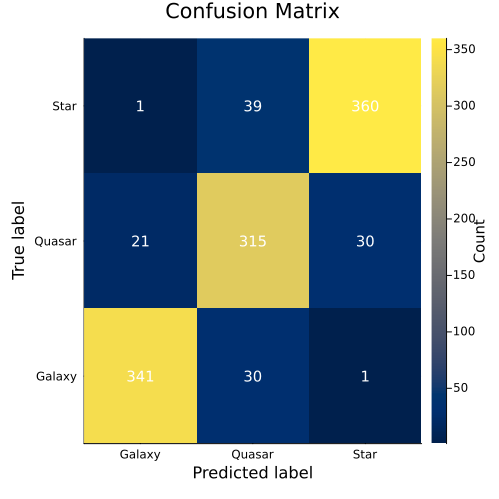

In [30]:
""" Printing the confusion matrix """
p0 = Visualization.plot_confusion_heatmap(DT_confusion)
display(p0)

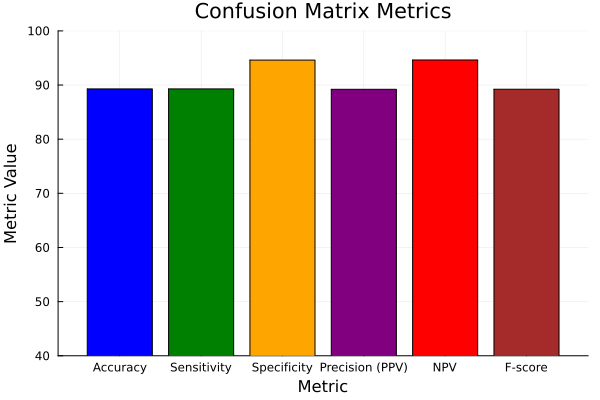

In [31]:
Visualization.plot_confusion_metrics(DT_acc, DT_sensitivity, DT_specificity, DT_PPV, DT_NPV, DT_F_score)

In [14]:
""" KNN MODEL """
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
ScikitLearn.fit!(knn_model, train_inputs, train_targets)

# Predict the targets for the test data
predicted_targets = ScikitLearn.predict(knn_model, test_inputs)

# Calculate and print the accuracy
KNN_acc, KNN_error_rate, KNN_sensitivity, KNN_specificity, KNN_PPV, KNN_NPV, KNN_F_score, KNN_confusion = confusionMatrix(predicted_targets, test_targets)

println("KNN model accuracy: $(KNN_acc * 100) %")
println("KNN model sensitivity: $(KNN_sensitivity * 100) %")
println("KNN model specificity: $(KNN_specificity * 100) %")
println("KNN model PPV: $(KNN_PPV * 100) %")
println("KNN model NPV: $(KNN_NPV * 100) %")
println("KNN model sensitivity: $(KNN_F_score * 100) %")

# Save the model
#JLD.save("knn_model_3rd.jld", "model", knn_model)

KNN model accuracy: 91.82776801405976 %
KNN model sensitivity: 91.82776801405974 %
KNN model specificity: 95.85658292038164 %
KNN model PPV: 91.8402189377515 %
KNN model NPV: 95.94244407513017 %
KNN model sensitivity: 91.77956243686197 %


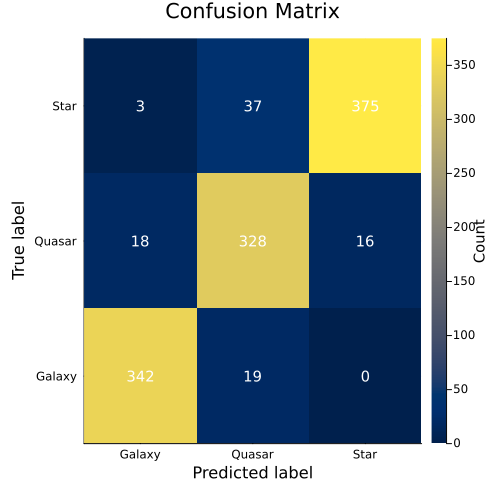

In [32]:
""" Printing the confusion matrix """
p1 = Visualization.plot_confusion_heatmap(KNN_confusion)
display(p1)

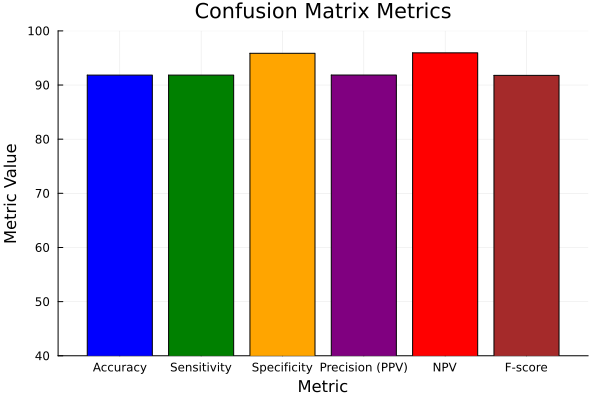

In [33]:
Visualization.plot_confusion_metrics(KNN_acc, KNN_sensitivity, KNN_specificity, KNN_PPV, KNN_NPV, KNN_F_score)

In [27]:
""" ANN MODEL """

ann_model = MLPClassifier(hidden_layer_sizes=(50, 30), activation="tanh", learning_rate_init=0.01, validation_fraction=0.1, n_iter_no_change=80, max_iter=1000, random_state=12345)

# Fit the model on the training data
ScikitLearn.fit!(ann_model, train_inputs, train_targets)

# Predict the targets for the test data
predicted_targets = ScikitLearn.predict(ann_model, test_inputs)

# Calculate and print the accuracy
ANN_acc, ANN_error_rate, ANN_sensitivity, ANN_specificity, ANN_PPV, ANN_NPV, ANN_F_score, ANN_confusion = confusionMatrix(predicted_targets, test_targets)

println("ANN model accuracy: $(ANN_acc * 100) %")
println("ANN model sensitivity: $(ANN_sensitivity * 100) %")
println("ANN model specificity: $(ANN_specificity * 100) %")
println("ANN model PPV: $(ANN_PPV * 100) %")
println("ANN model NPV: $(ANN_NPV * 100) %")
println("ANN model sensitivity: $(ANN_F_score * 100) %")

# Save the model
#JLD.save("ann_model_3rd.jld", "model", ann_model)

ANN model accuracy: 95.51845342706503 %
ANN model sensitivity: 95.51845342706503 %
ANN model specificity: 97.77706743737444 %
ANN model PPV: 95.4912238962934 %
ANN model NPV: 97.81003955997706 %
ANN model sensitivity: 95.49494586200004 %


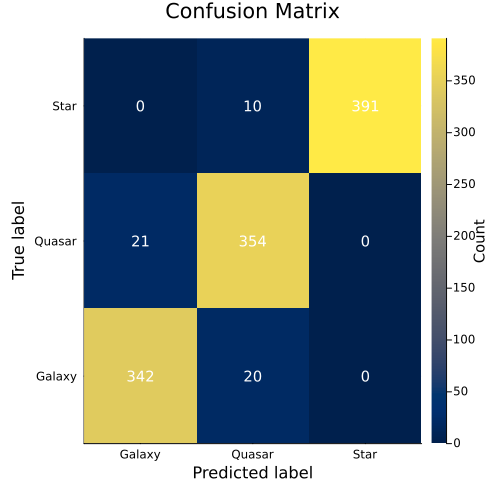

In [34]:
""" Printing the confusion matrix """
p2 = Visualization.plot_confusion_heatmap(ANN_confusion)
display(p2)

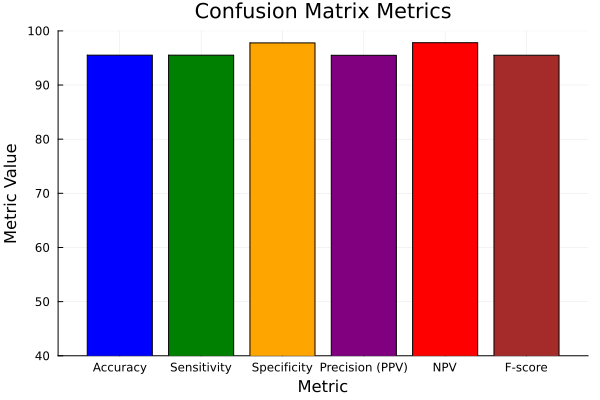

In [35]:
Visualization.plot_confusion_metrics(ANN_acc, ANN_sensitivity, ANN_specificity, ANN_PPV, ANN_NPV, ANN_F_score)

In [28]:
""" SVM MODEL """

svm_model = SVC(kernel = "rbf", degree = 3, C = 10.0, gamma = "auto")

# Fit the model on the training data
fit!(svm_model, train_inputs, train_targets)

# Predict the targets for the test data
predicted_targets = predict(svm_model, test_inputs)

# Calculate and print the accuracy
SVM_acc, SVM_error_rate, SVM_sensitivity, SVM_specificity, SVM_PPV, SVM_NPV, SVM_F_score, SVM_confusion = confusionMatrix(predicted_targets, test_targets)

println("SVM model accuracy: $(SVM_acc * 100) %")
println("SVM model sensitivity: $(SVM_sensitivity * 100) %")
println("SVM model specificity: $(SVM_specificity * 100) %")
println("SVM model PPV: $(SVM_PPV * 100) %")
println("SVM model NPV: $(SVM_NPV * 100) %")
println("SVM model sensitivity: $(SVM_F_score * 100) %")

# Save the model
#JLD.save("svm_model_3rd.jld", "model", svm_model)

SVM model accuracy: 94.99121265377856 %
SVM model sensitivity: 94.99121265377856 %
SVM model specificity: 97.48893663050383 %
SVM model PPV: 94.98545440746362 %
SVM model NPV: 97.56019430604904 %
SVM model sensitivity: 94.94735460151918 %


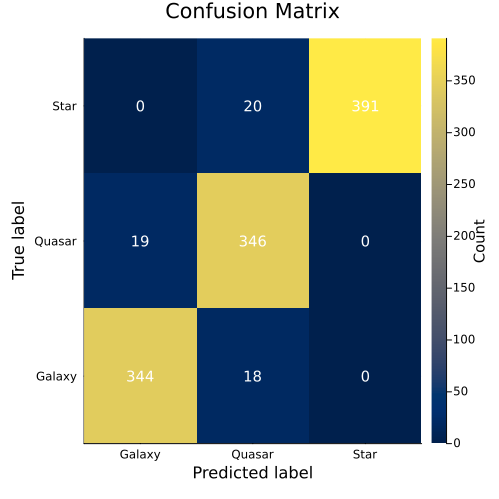

In [36]:
""" Printing the confusion matrix """
p3 = Visualization.plot_confusion_heatmap(SVM_confusion)
display(p3)

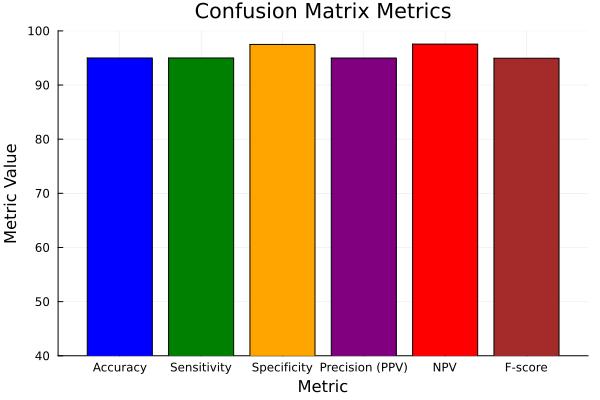

In [37]:
Visualization.plot_confusion_metrics(SVM_acc, SVM_sensitivity, SVM_specificity, SVM_PPV, SVM_NPV, SVM_F_score)

##### ENSEMBLE MODEL #####

In [29]:
@sk_import ensemble: VotingClassifier
@sk_import metrics: accuracy_score

# Define the base models with the chosen hyperparameters
dt_model = DecisionTreeClassifier(max_depth=50,  random_state=12345)
knn_model = KNeighborsClassifier(n_neighbors=5)
ann_model = MLPClassifier(hidden_layer_sizes=(50, 30), activation="tanh", learning_rate_init=0.01, validation_fraction=0.1, n_iter_no_change=80, max_iter=1000, random_state=12345) 
svm_model = SVC(kernel="rbf", degree=3, C=10.0, gamma="auto", probability=true)

# Create a list of tuples (name, model) for the base models
base_models = [
    ("DecisionTree", dt_model),
    ("kNN", knn_model),
    ("ANN", ann_model),
    ("SVM", svm_model)
]

# Create the soft voting ensemble
ensemble = VotingClassifier(estimators=base_models, voting="soft")

# Train the ensemble model
ScikitLearn.fit!(ensemble, train_inputs, train_targets)

# Evaluate the ensemble model
predicted_targets = ScikitLearn.predict(ensemble, test_inputs)
Ens_acc, Ens_error_rate, Ens_sensitivity, Ens_specificity, Ens_PPV, Ens_NPV, Ens_F_score, Ens_confusion = confusionMatrix(predicted_targets, test_targets)

println("Ensemble model accuracy: $(Ens_acc * 100) %")
println("Ensemble model sensitivity: $(Ens_sensitivity * 100) %")
println("Ensemble model specificity: $(Ens_specificity * 100) %")
println("Ensemble model PPV: $(Ens_PPV * 100) %")
println("Ensemble model NPV: $(Ens_NPV * 100) %")
println("Ensemble model sensitivity: $(Ens_F_score * 100) %")

# Save the model
#JLD.save("ensemble_3rd.jld", "model", ensemble)


Ensemble model accuracy: 94.5518453427065 %
Ensemble model sensitivity: 94.55184534270651 %
Ensemble model specificity: 97.27954891462286 %
Ensemble model PPV: 94.54221023023811 %
Ensemble model NPV: 97.3423632756425 %
Ensemble model sensitivity: 94.5034557345544 %


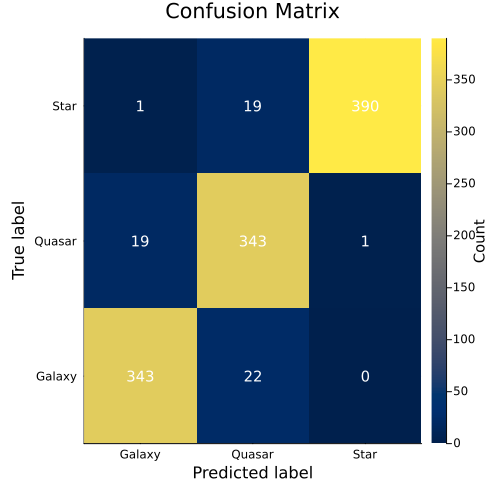

In [38]:
""" Printing the confusion matrix """
p4 = Visualization.plot_confusion_heatmap(Ens_confusion)
display(p4)

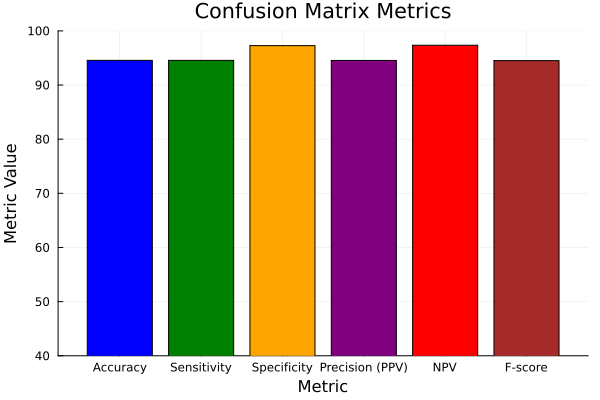

In [39]:
Visualization.plot_confusion_metrics(Ens_acc, Ens_sensitivity, Ens_specificity, Ens_PPV, Ens_NPV, Ens_F_score)

## Best Model Configuration and Performance

After extensive experimentation with various normalization configurations and cross-validation folds, utilizing **zero-mean** normalization in conjunction with a **10-fold** cross-validation yielded the most promising results. Decreasing the number of folds showed a small improvement on the ensemble metrics paired with a decrease in DT performance. The following table presents the top-performing models and their respective metrics under this configuration:

- **Artificial Neural Network (ANN)**: The best-performing ANN model uses the architecture [50, 30] with 'tanh' activation, a learning rate of 0.01, a validation fraction of 0.1, and a maximum of 10000 iterations.

- **Support Vector Machine (SVM)**: The SVM model that performed best had the 'rbf' kernel with a degree of 3, a C value of 10.0, and 'auto' gamma setting.

- **Decision Tree**: The best decision tree model had a maximum depth of 50.

- **K-Nearest Neighbors (KNN)**: The KNN model that yielded the best results had 5 neighbors, indicating a moderate level of complexity.

- **Ensemble Model**: The ensemble combines Decision Tree, kNN, ANN, and SVM models using soft voting classifier.

Here are the performance metrics:

| Best Model Configuration | Accuracy | Sensitivity | Specificity | PPV   | NPV   | F_Score |
|--------------------------|----------|-------------|-------------|-------|-------|---------|
| ANN                      | 95.52    | 95.52       | 97.78       | 95.49 | 97.81 | 95.49   |
| SVM                      | 94.99    | 94.99       | 97.49       | 94.99 | 97.56 | 94.95   |
| Decision Tree            | 89.28    | 89.28       | 94.60       | 89.20 | 94.62 | 89.22   |
| KNN                      | 91.83    | 91.83       | 95.86       | 91.84 | 95.94 | 91.78   |
| Ensemble                 | 94.55    | 94.55       | 97.28       | 94.54 | 97.34 | 94.50   |


### Best performing model 

The ANN model now outperforms the others with the highest accuracy, slightly outperforming the SVM and Ensemble models. This superior performance can be attributed to several factors. Firstly, ANNs are particularly effective in spaces where the dimensions are uncorrelated, which is the case after applying PCA. Secondly, ANNs are effective when the data is normalized to have zero mean, as it allows the ANN to better distinguish between the classes. Lastly, ANNs are robust against overfitting, especially in cases where the data is balanced. While accuracy remains a key metric, it's crucial to consider other metrics like sensitivity or specificity, where the best results were also obtained by the ANN model.

-----------------------------------------------------------------------------------------------------

## Best configuration with number of folds decreased to 5 and minmax

### Weak Models And Chosen Parameters

1. **K-Nearest Neighbors (KNN):**
   - Parameters: `n_neighbors=5`

2. **Support Vector Machine (SVM):**
   - Parameters: `kernel="rbf", degree=3, C=1.0, gamma="scale"`

3. **Artificial Neural Network (ANN):**
   - Architecture: `hidden_layer_sizes=(70, 40), activation="tanh", learning_rate_init=0.01, validation_fraction=0.1, n_iter_no_change=80, max_iter=10000`

4. **Decision Tree (DT):**
   - Parameters: `max_depth=10`


For min-max k=5:

| Best Model Configuration | Accuracy | Sensitivity | Specificity | PPV   | NPV   | F_Score |
|--------------------------|----------|-------------|-------------|-------|-------|---------|
| ANN                      | 72.93    | 72.93       | 86.39       | 80.47 | 87.75 | 71.34   |
| SVM                      | 89.98    | 89.98       | 94.88       | 90.18 | 95.12 | 89.93   |
| Decision Tree            | 73.37    | 73.37       | 86.61       | 73.27 | 86.59 | 73.28   |
| KNN                      | 87.78    | 87.78       | 93.79       | 88.02 | 94.09 | 87.62   |
| Ensemble                 | 85.41    | 85.41       | 92.59       | 85.69 | 92.58 | 85.45   |


As we can see, the metrics generally deteriorate when we opt for the min-max method over zero-mean normalization. This indicates that the normal distribution of the data becomes increasingly significant after applying PCA.